# Эмулятор классического рынка

Сущности: потребитель, продукт и фабрика. 
    Потребитель имеет потрбеность в продукте, фиксированный доход за период и логику потребления: приобретает продукт максимального качестве, если может себе это позволить. Среди всех доступных ему продуктов максимального качества покупает самый дешёвый. 
    Продут имеет цену и единую метрику качества (чем метрика больше, тем продукт качественней). 
    Фабрика проивзодит продукт. Фабрика имеет предел по текущему качеству продукции, себестоимость, бюджет и функции проивзодства, продажи и модернизации. Фабрика производит продукт с заданными характеристиками, если это не протвиоречит параметрам фабрики. Фабрика продаёт продукт, если есть, кому его купить. Фабрика каждый период тратит случайное число денег на случайное изменение качества и цены продукта. 

# Внешние импорты

In [1]:
import random
import numpy as np
import pandas as pd

#настройки, с которыми лучше
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)

# # будем отображать графики прямо в jupyter'e
# %matplotlib inline
# import seaborn as sns
# import matplotlib.pyplot as plt
# #графики в svg выглядят более четкими
# %config InlineBackend.figure_format = 'svg' 

# Классы и функции

In [24]:
# класс потребителя
class citizen:
    def __init__(self, id=0, money=100):
        # id
        self.id=id
        # доход за период
        self.money=money
    
    # функция потребления продуктов
    def consume(self, products):
        # возвращать будем продукт
        res=product(id=-1)
        av_pr_lst=[]
        # цикл для фильтрации тех, что не карману
        for pr in products:
            if self.money>=pr.price:
                av_pr_lst.append(pr)
        
        best_price=10000
        best_qv=0
        # цикл поиска лучшего качества
        for pr in av_pr_lst:
            if pr.quality>=best_qv:
                best_qv=pr.quality
        
        pr_qv_lst=[]
        # сбор всех продуктов лучшего качества
        for pr in av_pr_lst:
            if pr.quality==best_qv:
                pr_qv_lst.append(pr)
        
        # выбор из них тех, что дешевле
        for pr in pr_qv_lst:
            if pr.price<=best_price:
                best_price=pr.price
        
        # вывод продукта с лучшими характеристиками
        for pr in pr_qv_lst:
            if pr.price==best_price:
                res=pr
                break
        
        return res  

# класс продукта      
class product:
    def __init__(self, id=-1, quality=-100, price=-10000):
        self.id=id
        self.quality=quality
        self.price=price

        
# класс фабрики        
class factory:
    def __init__(self, id=-1, max_quality=0, cost=0, capital=1000,
                 hpur=0, hcapd=0, hcosts=0, hqvd=0
                ):
        # id
        self.id=id
        # предел качества продукта, мкеньше - можно
        self.max_quality=max_quality
        # себестоимость
        self.cost=cost
        # деньги у завода
        self.capital=capital
        # продажи прошлого периода
        self.hpur=hpur
        # капитал прошлого периода
        self.hcapd=hcapd
        # себестоимость прошлого периода
        self.hcosts=hcosts
        # качество прошлого периода
        self.hqvd=hqvd
        
    def print_m(self):
        print('id: ', self.id)
        print('max_quality: ', self.max_quality)
        print('cost: ', self.cost)
        print('capital: ', self.capital)
        print('hpur: ', self.hpur)
        print('hcapd: ', self.hcapd)
        print('hcosts: ', self.hcosts)
        print('hqvd: ', self.hqvd)
        
    #  функция проищводтсва
    def produce(self, id, price, quality):
        # если норм по себестоимости и производственным мощносмтям, то вперёд
        if (price>self.cost) and (quality<=self.max_quality):
            return product(id=id, quality=quality, price=price)
        else:
            return product(id=-1)
    
    # функция проверки кредитоспособности
    def check(self):
        if self.capital<0:
            return -1
        else:
            return 0
    
    # функция продаж
    def sell(self, product):
        # если мы ещё не разорились, то производим
        if (self.check()==0) and (product.price>0):
            self.capital=self.capital-self.cost
        # и потом продаём
        if self.check()==0 and (product.price>0):
            self.capital=self.capital+product.price
    # храним историю продаж
    def hist(self, hpur=0, hcapd=0, hcosts=0, hqvd=0):
        # пока память у нас как у рыбки
        self.hpur=hpur
        self.hcapd=hcapd
        self.hcosts=hcosts
        self.hqvd=hqvd

    # функция модернизации
    def modernise(self, capd, costd, qvd):
        # если у нас были продажи, то экспериментируем
        # если нет - вернулись к тому, что было изначально
        if self.hpur>0:
            if self.max_quality+qvd>0:
                self.max_quality=self.max_quality+qvd
            if self.cost+costd>0:
                self.cost=self.cost+costd
            self.capital=self.capital+capd
            if self.capital<0:
                self.capital=0
        else:
            self.max_quality=self.hqvd
            self.cost=self.hcosts

        

In [34]:
# функция рынка - место встречи спроса и предложения
def market(period, citizens, factories):
    products=[]
    # заводы производят продукты
    for f in factories:
        if f.capital>0:
            p=f.produce(id=f.id, price=f.cost+1, quality=f.max_quality)
            products.append(p)
        
    cid_lst=[]
    prod_lst=[]
    fact_lst=[]
    price_lst=[]
    qv_lst=[]
    money_lst=[]
    
    # жители потребляют то, что нравится больше всего
    for i in range(N):
        cons=citizens[i].consume(products)
        try:
            factories[cons.id].sell(cons)
            cid_lst.append(i)
            prod_lst.append(cons.id)
            fact_lst.append(cons.id)
            price_lst.append(cons.price)
            qv_lst.append(cons.quality)
            money_lst.append(citizens[i].money)
        except:
            pass

    # логируем результаты со стороны рынка
    market_log_df=pd.DataFrame([cid_lst, money_lst, prod_lst, fact_lst, price_lst, qv_lst]).T
    market_log_df.columns=['citizen_id', 'citizen_money', 'product_id', 'factory_id', 'price', 'qv']
    market_log_df['citizen_id']=market_log_df['citizen_id'].astype('int')
    market_log_df['product_id']=market_log_df['product_id'].astype('int')
    market_log_df['factory_id']=market_log_df['factory_id'].astype('int')
    return market_log_df

# функция преобразования массива объектов класса жителей в датафрейм
def cit_to_df(lst):
    ids=[]
    ms=[]
    for c in lst:
        ids.append(c.id)
        ms.append(c.money)
    
    df=pd.DataFrame([ids, ms]).T
    df.columns=['citizen_id', 'citizen_money']
    df['citizen_id']=df['citizen_id'].astype('int')
    
    return df

# функция преобразования массива объектов класса фабрик в датафрейм
def fact_to_df(lst):
    ids=[]
    cap=[]
    mq=[]
    cst=[]
    for c in lst:
        ids.append(c.id)
        cap.append(c.capital)
        mq.append(c.max_quality)
        cst.append(c.cost)
    
    df=pd.DataFrame([ids, cap, mq, cst]).T
    df.columns=['factory_id', 'factory_capitalisation', 'factory_max_quality', 'factory_cost']
    df['factory_id']=df['factory_id'].astype('int')
    df['factory_max_quality']=df['factory_max_quality'].astype('int')
    
    return df
        

# Определяем структуру

In [37]:
# число жителей
N=2000
# разброс зарплат
max_salary=100
min_salary=5

# число заводов
k=50
# разброс расходов
max_cost=50
min_cost=15

# разброс качества
max_qv=30
min_qv=2

# разброс капитала
cap_avarage=1000
cap_disp=300

In [38]:
cit_lst=[]
for i in range(N):
    # равномерный рандом
#     cit=citizen(id=i, money=random.randint(min_salary, max_salary))
    # нормально распределённый рандом
#     cit=citizen(id=i, money=random.normalvariate((max_salary-min_salary)/2, 10))
    # распределение, похожее на реальное
    cit=citizen(id=i, money=random.gammavariate(3, 10))
    cit_lst.append(cit)

In [39]:
fact_lst=[]
for j in range(k):
    f=factory(id=j, 
              max_quality=random.randint(min_qv, max_qv), 
              cost=random.randint(min_cost, max_cost), 
              capital=random.normalvariate(cap_avarage, cap_disp)) 
    fact_lst.append(f)

In [7]:
# # для тестирования
# cit_lst=[]
# cit_lst.append(citizen(id=0, money=10))
# cit_lst.append(citizen(id=1, money=50))

# fact_lst=[]
# fact_lst.append(factory(id=0, 
#               max_quality=10, 
#               cost=3, 
#               capital=1000))

# fact_lst.append(factory(id=1, 
#               max_quality=99, 
#               cost=30, 
#               capital=5000))

# Моделируем

## Модель спроса

In [8]:
cit_df=cit_to_df(cit_lst)

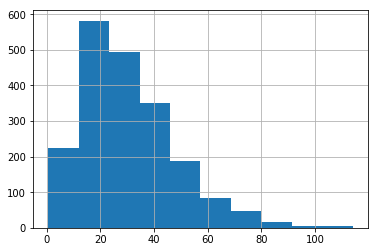

In [10]:
cit_df['citizen_money'].hist()

In [11]:
nn=[]
rng=range(1, 100, 1)
for pr in rng:
    ch=[]
    for i in range(N):
        cons=cit_lst[i].consume([product(id=1, quality=pr, price=pr)])
        if cons.id>=0:
            ch.append(cons.price)
    nn.append(len(ch))
spros_df=pd.DataFrame(nn, index=rng)

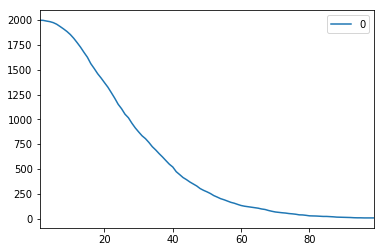

In [12]:
spros_df.plot()

## Модель предложения

In [13]:
fct_df=fact_to_df(fact_lst)

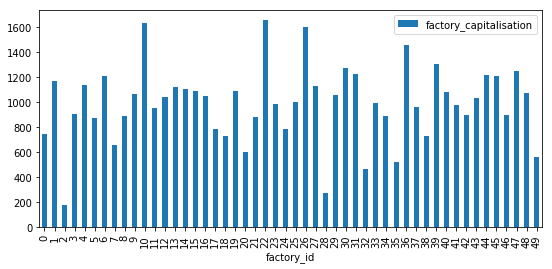

In [14]:
fct_df.set_index('factory_id')[['factory_capitalisation']].plot(kind='bar', figsize=(9,4))

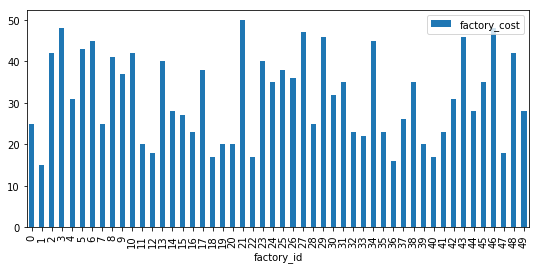

In [15]:
fct_df.set_index('factory_id')[['factory_cost']].plot(kind='bar', figsize=(9,4))

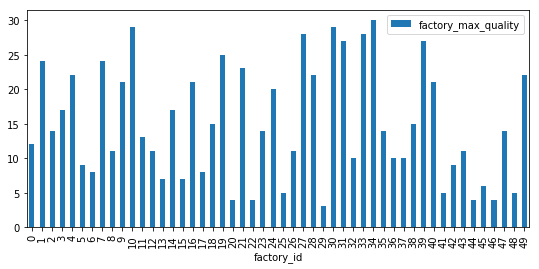

In [16]:
fct_df.set_index('factory_id')[['factory_max_quality']].plot(kind='bar', figsize=(9,4))

In [17]:
qv=2
pp=[]
rng=range(1, 100, 1) 
for pr in rng:
    pred_lst=[]
    for j in range(k):
        r=fact_lst[j].produce(id=j, price=pr, quality=qv)
        if r.price>0:
            pred_lst.append(r.price)
    pp.append(len(pred_lst))
pred_df=pd.DataFrame(pp, index=rng)

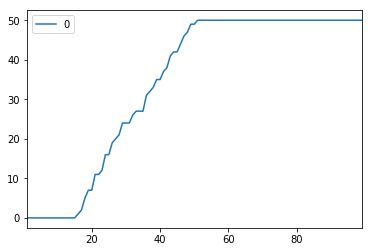

In [18]:
pred_df.plot()

## Рыночное равновесие

In [19]:
spros_df=spros_df.reset_index()
spros_df['spros_share']=spros_df[0]/np.max(spros_df[0])

pred_df=pred_df.reset_index()
pred_df['pred_share']=pred_df[0]/np.max(pred_df[0])

mrkt=spros_df.merge(pred_df, 'left', on='index')

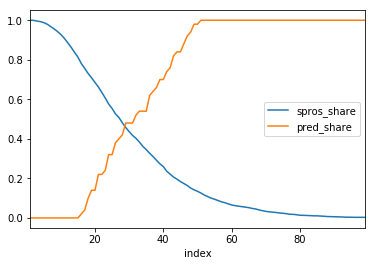

In [20]:
mrkt.set_index('index')[['spros_share', 'pred_share']].plot()

## Динамика

In [40]:
# разброс инвестиций
capd_avarage=-100
capd_disp=50

# разброс изменений себестоимости
costd_avarage=0
costd_disp=3

# разброс изменений качества
qvd_avarage=0
qvd_disp=1

In [41]:
# обновляем таблицы
factories_log=pd.DataFrame()
mrkt_log=pd.DataFrame()


period_num=0
fct_df=fact_to_df(fact_lst)
fct_df['period']=period_num
fct_df['investions']=0
fct_df['qv_diff']=0
fct_df['cost_diff']=0
fct_df['citizen_id']=0
fct_df['price']=0
factories_log=pd.concat([factories_log, fct_df ])

# наичнаем моделирование
for period_num in range(1,50):    
    # начинаем продавать-покупать
    mrkt=market(period=period_num, citizens=cit_lst, factories=fact_lst)
    mrkt['period']=period_num
    mrkt_log=pd.concat([mrkt_log, mrkt])
    
    gr_st=mrkt.groupby(['factory_id']).agg({'citizen_id': lambda x: x.nunique(),
                                                'price': np.sum,
                                               }).reset_index()
    
    # вносим измегнения в нашу инфраструктуру
    capd_lst=[]
    costd_lst=[]
    gvd_lst=[]
    for j in range(k):
        # переменная с историей продаж каждой фабрики
        pser=gr_st[gr_st['factory_id']==j]['citizen_id']
        if len(pser)!=0:
            pur=pser.values[0]
        # если нет в списке продаж, то ноль
        else:
            pur=0
        
        capd=random.normalvariate(capd_avarage, capd_disp)
        costd=random.normalvariate(costd_avarage, costd_disp)
        qvd=random.normalvariate(qvd_avarage, qvd_disp)
        
        capd_lst.append(capd)
        costd_lst.append(costd)
        gvd_lst.append(qvd)
        fact_lst[j].modernise(capd, costd, qvd)
        fact_lst[j].hist(hpur=pur, hcapd=capd, hcosts=costd, hqvd=qvd)


    # логируем изменения
    fct_df=fact_to_df(fact_lst)
    
    fct_df['period']=period_num
    fct_df['investions']=capd_lst
    fct_df['qv_diff']=gvd_lst
    fct_df['cost_diff']=costd_lst
    
    
    fct_df=fct_df.merge(gr_st, 'left', on='factory_id')
    factories_log=pd.concat([factories_log, fct_df])
    


In [42]:
mkrt_stat=mrkt_log.groupby(['period', 'product_id', 'price', 'qv']).agg({'citizen_id': lambda x: x.nunique()
                                                              }).reset_index()

In [44]:
mkrt_stat[0:12]

,period,product_id,price,qv,citizen_id
0,1,-1,-10000.000000,-100.000000,450
1,1,33,16.000000,30.000000,1550
2,2,-1,-10000.000000,-100.000000,1
3,2,0,1.000000,0.000000,1999
4,3,15,2.613888,2.468224,8
5,3,35,3.726817,2.669987,1984
6,3,40,-1.071940,1.744349,8
7,4,8,-0.923987,1.350390,5
8,4,33,2.457436,1.679062,1995
9,5,21,2.880730,2.947973,1991


In [45]:
factories_log[0:30]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
0,0,1174.557123,5,30.0,0,0.0,0.0,0.0,0.0,0.0
1,1,817.567533,2,41.0,0,0.0,0.0,0.0,0.0,0.0
2,2,808.754433,6,32.0,0,0.0,0.0,0.0,0.0,0.0
3,3,1064.001694,27,37.0,0,0.0,0.0,0.0,0.0,0.0
4,4,616.932092,18,33.0,0,0.0,0.0,0.0,0.0,0.0
5,5,211.817022,19,33.0,0,0.0,0.0,0.0,0.0,0.0
6,6,425.406126,14,50.0,0,0.0,0.0,0.0,0.0,0.0
7,7,714.669705,28,43.0,0,0.0,0.0,0.0,0.0,0.0
8,8,922.121612,7,28.0,0,0.0,0.0,0.0,0.0,0.0
9,9,1550.557720,26,42.0,0,0.0,0.0,0.0,0.0,0.0


In [40]:
mrkt_log[0:3]

,citizen_id,citizen_money,product_id,factory_id,price,qv,period
0,0,32.302667,33,33,23.0,28.0,1
1,1,5.312059,-1,-1,-10000.0,-100.0,1
2,2,11.516783,-1,-1,-10000.0,-100.0,1


In [41]:
factories_log[0:3]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
0,0,748.879919,12,25.0,0,0.0,0.0,0.0,0.0,0.0
1,1,1169.025370,24,15.0,0,0.0,0.0,0.0,0.0,0.0
2,2,178.008063,14,42.0,0,0.0,0.0,0.0,0.0,0.0


In [42]:
diff=factories_log.groupby('period').mean()[['investions','qv_diff', 'cost_diff']]

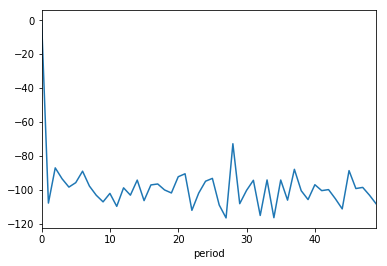

In [43]:
diff['investions'].plot()

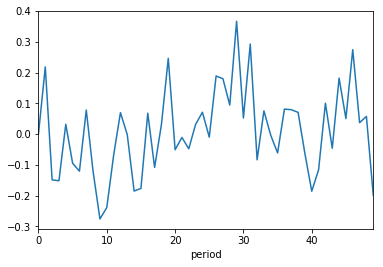

In [44]:
diff['qv_diff'].plot()

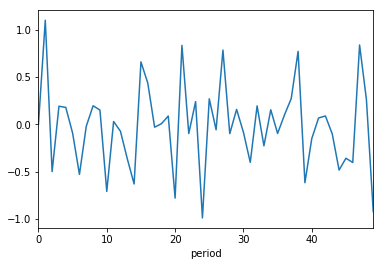

In [45]:
diff['cost_diff'].plot()

In [46]:
sales=factories_log[factories_log['citizen_id']>0]

In [47]:
sales[0:3]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
1,1,1379.875635,23,23.000105,1,-26.149734,-0.891143,8.000105,237.0,3792.0
30,30,1520.744700,29,33.293629,1,-176.567606,0.949871,1.293629,419.0,13827.0
33,33,1298.542126,27,21.361853,1,-141.687589,-0.626344,-0.638147,446.0,10258.0


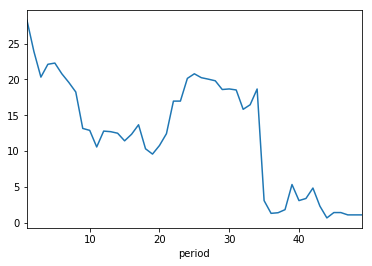

In [48]:
sales.groupby('period').mean()['factory_cost'].plot()

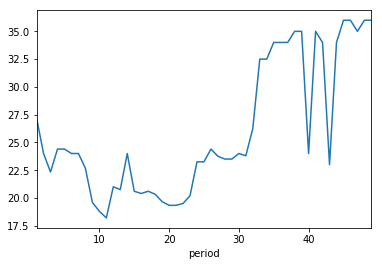

In [49]:
sales.groupby('period').mean()['factory_max_quality'].plot()

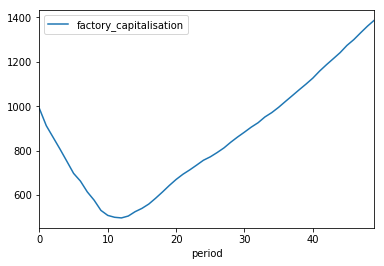

In [50]:
factories_log.groupby('period').mean()[['factory_capitalisation']].plot()

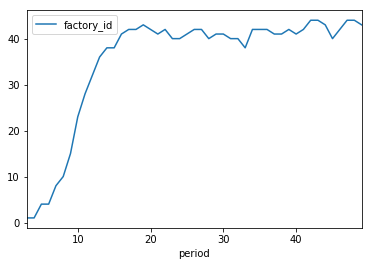

In [51]:
factories_log[factories_log['factory_capitalisation']<=0].groupby('period').agg(
    {'factory_id': lambda x: x.nunique()}).plot()

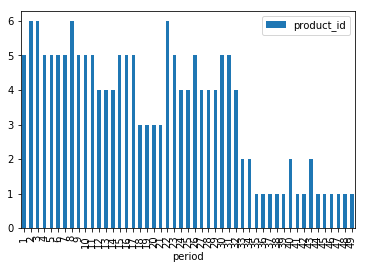

In [52]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').agg({'product_id': lambda x: x.nunique()}).plot(kind='bar')

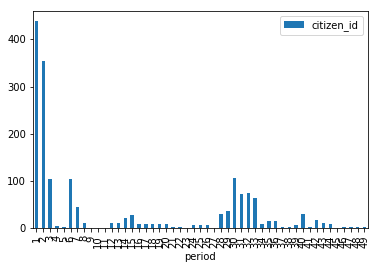

In [53]:
mrkt_log[mrkt_log['product_id']==-1].groupby('period').agg({'citizen_id': lambda x: x.nunique()}).plot(kind='bar')

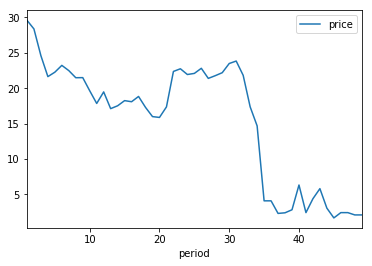

In [54]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').mean()[['price']].plot()

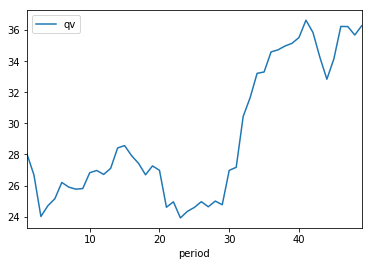

In [55]:
mrkt_log[mrkt_log['product_id']>0].groupby('period').mean()[['qv']].plot()

In [56]:
mrkt_log.groupby(['period', 'product_id', 'price', 'qv']).agg({'citizen_id': lambda x: x.nunique(),
                                               }
                                              )

citizen_id
period product_id price         qv                     
1      -1         -10000.000000 -100.000000         439
        1          16.000000     24.000000          237
        30         33.000000     29.000000          419
        33         23.000000     28.000000          446
        34         46.000000     30.000000          348
        39         21.000000     27.000000          111
2      -1         -10000.000000 -100.000000         354
        19         19.650491     25.345624          120
        30         34.293629     29.949871          315
        33         22.361853     27.373656          540
        34         43.550624     32.259349          401
        39         22.079303     25.469591           10
        47         14.574336     13.363611          260
3      -1         -10000.000000 -100.000000         103
        12         18.605756     12.016306           23
        19         19.144046     24.882360          128
        30         35.587258     28.829388          207
        33         21.723707     25.992940          610
        34         41.101247     31.513976          467
        47         8.580114      12.008985          462
4      -1         -10000.000000 -100.000000           4
        19         18.637601     24.454078           44
        30         31.233560     27.930991          252
        33         19.585325     26.610095          563
        34         38.284447     32.209693          575
        47         2.585893      13.676512          562
5      -1         -10000.000000 -100.000000           3
        30         33.620196     29.905882          147
        33         19.764045     27.064024          643
        34         37.752100     31.853746          593
        39         15.285387     22.373725          229
        47         2.386404      11.469702          385
6      -1         -10000.000000 -100.000000         104
        30         36.685397     30.192348           45
        33         18.551700     27.285438          808
        34         37.906788     31.678007          586
        39         14.576853     22.505885          207
        47         8.656384      12.184841          250
7      -1         -10000.000000 -100.000000          44
        30         34.022644     30.305989            8
        33         20.596413     26.817746          620
        34         34.277766     32.292630          716
        39         13.868318     21.860670          341
        47         6.150434      11.860721          271
8      -1         -10000.000000 -100.000000          11
        16         18.157404     22.950583          226
        19         22.676322     23.442870           64
        33         23.742377     25.769621          272
        34         29.605303     32.299725          893
        39         13.632597     22.292071          241
        47         3.365228      11.398395          293
9      -1         -10000.000000 -100.000000           1
        16         13.942569     24.008056          448
        22         1.556509      9.010659            33
        33         22.619422     27.121883          411
        34         31.383941     31.853429          822
        47         5.508129      11.241665          285
10     -1         -10000.000000 -100.000000           1
        16         9.727734      23.136309          790
        22         1.248381      8.017095            18
        33         25.673937     25.723506          178
        34         29.556176     32.872277          894
        47         4.545292      10.386234          119
11     -1         -10000.000000 -100.000000           1
        16         9.324354      21.923180          832
        22         1.248381      7.261693            22
        34         26.213434     32.830291         1040
        39         8.302160      21.438395           30
        47         4.841617      9.659619            75
12     -1         -10000.000000 -100.000000          11
        22   

In [57]:
#31 41
factories_log[factories_log['factory_id']==41]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
41,41,976.037063,5,23.000000,0,0.000000,0.000000,0.000000,0.0,0.0
41,41,826.357244,4,22.442790,1,-149.679819,-0.131630,-0.557210,NaN,NaN
41,41,669.417077,5,22.532819,2,-156.940167,0.465565,0.090029,NaN,NaN
41,41,576.317797,4,27.199171,3,-93.099280,-0.441819,4.666353,NaN,NaN
41,41,396.431439,5,18.486527,4,-179.886358,0.655851,-8.712644,NaN,NaN
41,41,267.074971,6,13.276949,5,-129.356468,0.741303,-5.209578,NaN,NaN
41,41,145.771119,4,15.768548,6,-121.303852,-2.088997,2.491599,NaN,NaN
41,41,0.000000,5,19.119220,7,-154.504725,1.018340,3.350672,NaN,NaN
41,41,0.000000,3,25.911043,8,-110.787338,-1.307705,6.791823,NaN,NaN
41,41,0.000000,4,20.964316,9,-101.712392,0.660055,-4.946727,NaN,NaN


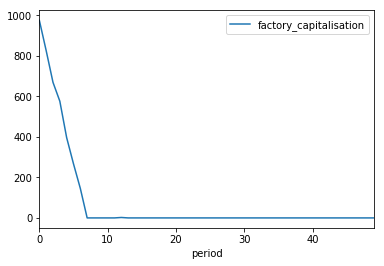

In [58]:
factories_log[factories_log['factory_id']==41].set_index('period')[
    ['factory_capitalisation']].plot()

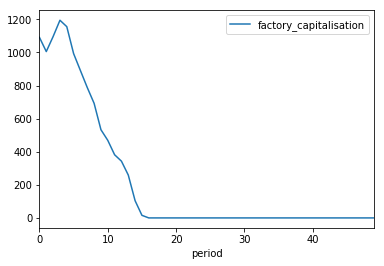

In [59]:
factories_log[factories_log['factory_id']==19].set_index('period')[['factory_capitalisation']].plot()

In [60]:
mrkt_log[mrkt_log['period']==49].groupby('product_id').agg({'citizen_id': lambda x: x.nunique()})

,citizen_id
product_id,
-1,2
28,1998


In [61]:
#31 41
factories_log[factories_log['factory_id']==20]

,factory_id,factory_capitalisation,factory_max_quality,factory_cost,period,investions,qv_diff,cost_diff,citizen_id,price
20,20,602.751405,4,20.000000,0,0.000000,0.000000,0.000000,0.0,0.0
20,20,505.846357,4,16.446140,1,-96.905048,0.970632,-3.553860,NaN,NaN
20,20,481.867536,6,12.519545,2,-23.978821,1.094000,-3.926595,NaN,NaN
20,20,317.746656,6,14.254291,3,-164.120880,0.329181,1.734746,NaN,NaN
20,20,215.773905,7,13.261515,4,-101.972751,0.764010,-0.992776,NaN,NaN
20,20,87.082223,8,14.404208,5,-128.691681,0.996411,1.142693,NaN,NaN
20,20,38.496943,7,12.956419,6,-48.585281,-0.295932,-1.447789,NaN,NaN
20,20,0.000000,8,18.858802,7,-124.389064,0.346207,5.902383,NaN,NaN
20,20,0.000000,7,17.631408,8,-17.316745,-0.286188,-1.227394,NaN,NaN
20,20,0.000000,8,18.266820,9,-184.659962,0.752218,0.635412,NaN,NaN
